# Basic Search

## Hyperparameter Nature



*   **Some hyperparameters are discrete**
    *    number of estimators in ensemble models
*   **Some hyperparameters are continuous**
    *    Penalization coefficient
    *    Number of samples per split
*   **Some hyperparameters are categorical**
    *    Loss (deviance, exponential)
    *    Regularization (Lasso, Ridge)



## Considerations

**When we create hyperparameter sampling strategies we need to consider:**



*   **Number of hyperparameters of the machine learning model**
*   **The low effective dimension**
*   **The nature of the parameters (discrete, continuous)**
*   **The computing resources available to us**





## Basic Hyperparameter Tuning Methods



*   **Manual Search**
*   **Grid Search**
*   **Random Search**



### Manual Search

***Different hyperparameters are set and experimented with manually.***

#### Uses



*   **Used to identify regions of promising hyperparameters**
*   **To delimit the Grid Search**
*   **Get familiar with the hyperparameters and their effect on the models**
*   **Establishing the benchmark model**





#### Limitations



*   **Lack of reproducibility**
*   **Time consuming**
*   **Does not explore the entire hyperparameter space**
*   **Does not scale**



#### Implementation

you just play with the parameters to estimate the prefered hyperparameters

### Grid Search

**Exhaustive search through a specified subset of hyperparameters of a learning algorithm.**

Examines ***all possible combinations*** of the specified hyperparameters.

Has a Cartesian product

Combinations: 

>   ℎ𝑦𝑝1 × ℎ𝑦𝑝2 × … × ℎ𝑦𝑝𝑛

#### Limitations



*   **Curse of dimensionality**: possible combinations grow exponentially with the number of hyperparameters
*   **Computationally expensive**
*   Hyperparameter **values** are **determined manually**
*   **Not ideal for continuous hyperparameters**
    *   A subset of “reasonable” hyperparameter values are set manually
*   Does not explore the entire hyperparameter space **(not feasible)**
*   It **performs worse** than other searches **(for models with complex hyperparameter spaces)**



#### Advantages



*   **For models with simpler hyperparameter spaces works well.**
*   **It can be parallelized.**



#### Considerations
***Grid Search is the most expensive method in terms of total computation time. However, if run in parallel, it is fast in terms of wall clock time.***

***Sometimes, we run a small grid, determine where the optimum lies, and then expand the grid in that direction.***

#### Implementation

In [ ]:
from sklearn.model_selection import (
    GridSearchCV
)

only for example

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# set up the model
gbm = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
param_grid = dict(
    n_estimators=[10, 20, 50, 100],
    min_samples_split=[0.1, 0.3, 0.5],
    max_depth=[1,2,3,4,None],
    )

print('Number of hyperparam combinations: ', 
      len(param_grid['n_estimators'])
      *len(param_grid['min_samples_split'])
      *len(param_grid['max_depth']))

Number of hyperparam combinations:  60


In [ ]:
# set up the search
search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=5, refit=True)

# gbm is your model object.
# param_grid is your list of parameters.
# scoring is the type of the scoring function.
# cv is your cross validation scheme.
# refit: Refit an estimator using the best found parameters on the whole dataset.

# find best hyperparameters
 search.fit(X_train, y_train)

In [ ]:
# the best hyperparameters are stored in an attribute

search.best_params_

***plot the accuracies***

In [ ]:
# we also find the data for all models evaluated

results = pd.DataFrame(search.cv_results_)

print(results.shape)

results.head()

In [ ]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].head()

In [ ]:
results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].tail()

In [ ]:
# plot model performance and error

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

use this to see the effects of ***low effective dimension***

In [ ]:
# let's make a function to evaluate the model performance based on
# single hyperparameters

def summarize_by_param(hparam):
    
    tmp = pd.concat([
        results.groupby(hparam)['mean_test_score'].mean(),
        results.groupby(hparam)['mean_test_score'].std(),
    ], axis=1)

    tmp.columns = ['mean_test_score', 'std_test_score']
    
    return tmp

In [ ]:
# performance change for n_estimators

tmp = summarize_by_param('param_n_estimators')

tmp.head()

In [ ]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

In [ ]:
tmp = summarize_by_param('param_max_depth')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

In [ ]:
tmp = summarize_by_param('param_min_samples_split')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)

This parameter does not seem to improve performance much.

***now remove the low effective dimensionality parameters***

In [ ]:
# determine the hyperparameter space
# remove the low dimensionality parameters
param_grid = dict(
    n_estimators=[60, 80, 100, 120],
    max_depth=[2,3],
    loss = ['deviance', 'exponential'],
    )

# set up the search
search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=5, refit=True)

# find best hyperparameters
search.fit(X_train, y_train)

***now for more than 1 hyperparameter space use this example***

In [ ]:
# set up the model
svm = SVC(random_state=0)

# determine the hyperparameter space
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

still works with this codes

In [ ]:
# we also find the data for all models evaluated

results = pd.DataFrame(search.cv_results_)

print(results.shape)

results.head()

In [ ]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[[
    'param_C', 'param_kernel', 'param_gamma',
    'mean_test_score', 'std_test_score',
]].head()

In [ ]:
results[[
    'param_C', 'param_kernel', 'param_gamma',
    'mean_test_score', 'std_test_score',
]].tail()

In [ ]:
# plot model performance and error

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

### Random Search

***Hyperparameter values are selected by independent (random) draws from a uniform distribution of the hyperparameter space.***

***In plain English, Random Search selects the combinations of hyperparameter values at random from all the possible combinations given a hyperparameter space.***




*   Examines **some combinations** of the specified hyperparameters, **selected at random**.
*   **User** ***determines*** **the number of combinations** to examine.



#### Grid vs Random Search



*   **Random Search allows the exploration of more dimensions of the important parameter**
*   **Grid Search wastes time exploring non-important dimensions**

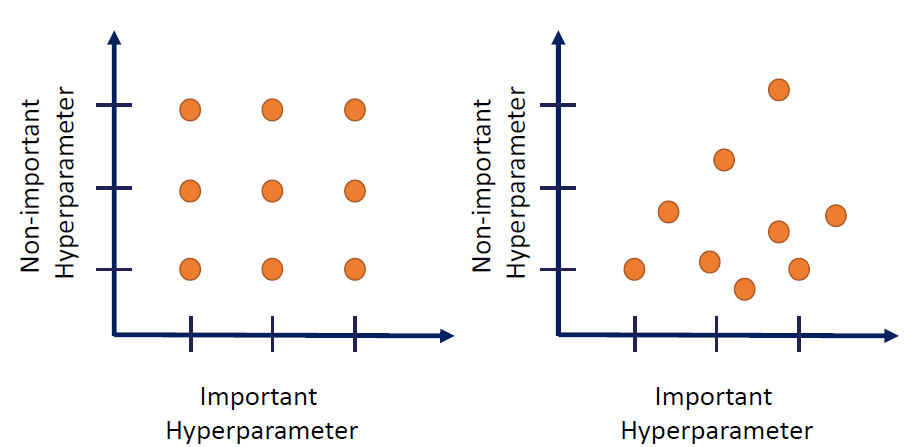





*   **Random Search selects values from a distribution of parameter values**
*   **As opposed to Grid Search where parameters are defined manually.**



*   ***Random Search is suitable for continuous hyperparameters***

##### Advantages

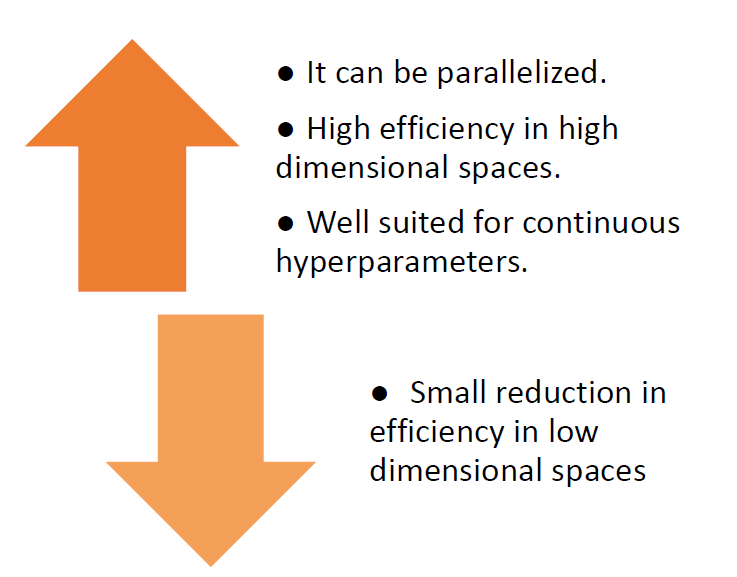

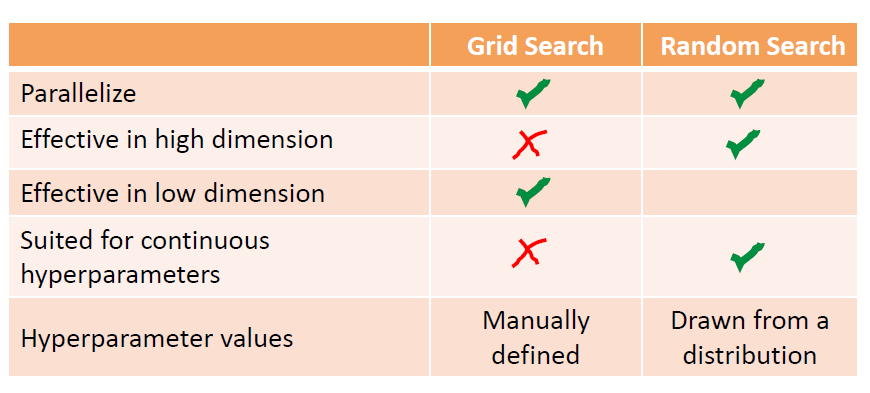

#### Considerations



*   **We choose a (computational) budget independently(ish) of the number of parameters and possible values.**
*   **Adding parameters that do not influence the performance does not decrease efficiency of the search (if enough iterations are allowed).**
*   **Important to specify a continuous distribution of the hyperparameter to take full advantage of the randomization.**



#### Implementation

##### Random Search for Hyperparameters in scikit-learn


https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [ ]:
from sklearn.model_selection import (
    RandomizedSearchCV
)

**for distribution we use scipy package**

In [ ]:
from scipy import stats

###### Random Search

Let's use Grid Search to find the best hyperparameters for a Gradient Boosting Classifier.

In [ ]:
# set up the model
gbm = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
param_grid = dict(
    n_estimators=stats.randint(10, 120),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    loss=('deviance', 'exponential'),
    )

# for mor information on stats module see the scipy documentation

In [ ]:
# set up the search
search = RandomizedSearchCV(gbm,
                            param_grid,
                            scoring='roc_auc',
                            cv=5,
                            n_iter = 60, # is the number of random searches
                            random_state=10,
                            n_jobs=4,
                            refit=True)

# find best hyperparameters
search.fit(X_train, y_train)

In [ ]:
# the best hyperparameters are stored in an attribute

search.best_params_

**PLOT**

In [ ]:
# we also find the data for all models evaluated

results = pd.DataFrame(search.cv_results_)

print(results.shape)

results.head()

In [ ]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

#differ for other algorithms
results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].head()

In [ ]:
results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].tail()

In [ ]:
# plot model performance and error

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

**for the low effect dimensionality**

In [ ]:
# let's make a function to evaluate the model performance based on
# single hyperparameters

def summarize_by_param(hparam):
    
    tmp = pd.concat([
        results.groupby(hparam)['mean_test_score'].mean(),
        results.groupby(hparam)['mean_test_score'].std(),
    ], axis=1)

    tmp.columns = ['mean_test_score', 'std_test_score']
    
    return tmp

In [ ]:
# performance change for n_estimators

tmp = summarize_by_param('param_n_estimators')

tmp.head()

In [ ]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

The optimal hyperparameter seems to be somewhere between this plot use it to determine the possible best parameter.

In [ ]:
tmp = summarize_by_param('param_max_depth')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

The optimal hyperparameter seems to be somewhere between this plot use it to determine the possible best parameter.

In [ ]:
tmp = summarize_by_param('param_min_samples_split')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)

This some parameter does not seem to improve performance much.

you can also plot for categorical parameters

In [ ]:
tmp = summarize_by_param('param_loss')
tmp['mean_test_score'].plot.bar(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylim(0.97,1)

##### Randomized Search with Scikit-Optimize

In this notebook, we will perform **Randomized Search** to select the best **hyperparameters** for a Gradient Boosting Classifier, using the open source Python package [Scikit-Optimize](https://scikit-optimize.github.io/stable/index.html).

The randomized search is performed with the class [dummy_minimize](https://scikit-optimize.github.io/stable/modules/generated/skopt.dummy_minimize.html#skopt.dummy_minimize).


### Procedure

To tune the hyper-parameters of our model we need to:

- define a model
- decide which parameters to optimize
- define the objective function we want to minimize.

### NOTE

Scikit-Optimize will always **minimize** the objective function, so if we want to maximize a function, for example the roc-auc, we need to **negate** the metric. Thus, instead of maximizing the roc-auc, we minimize the -roc-auc.

also require

>   dimensions : list, shape (n_dims,)

>>List of search space dimensions. Each search dimension can be defined either as
>>*   a (lower_bound, upper_bound) tuple (for Real or Integer dimensions),
>>*   a (lower_bound, upper_bound, prior) tuple (for Real dimensions),
>>*   as a list of categories (for Categorical dimensions), or
>>*   an instance of a Dimension object (Real, Integer or Categorical).

and also you can set

>initial_point_generator : str, InitialPointGenerator instance, default: "random"

>>Sets a initial points generator. Can be either
>>*   "random" for uniform random numbers,
>>*   "sobol" for a Sobol sequence,
>>*   "halton" for a Halton sequence,
>>*   "hammersly" for a Hammersly sequence,
>>*   "lhs" for a latin hypercube sequence,
>>*   "grid" for a uniform grid sequence

see the documentation for more info

In [ ]:
from skopt import dummy_minimize # for the randomized search
from skopt.plots import plot_convergence # plots the convergence
from skopt.space import Real, Integer, Categorical # for our hyper-parameter space 
from skopt.utils import use_named_args

###### Define the Hyperparameter Space

Scikit-optimize provides an utility function to create the range of values to examine for each hyperparameters. More details in [skopt.Space](https://scikit-optimize.github.io/stable/modules/generated/skopt.Space.html)

In [ ]:
# With Integer, we create a space of integers, sampled uniformly
# between the minimum and maximum indicated values

Integer(10, 120, name="n_estimators")

Integer(low=10, high=120, prior='uniform', transform='identity')

In [ ]:
# With Real, we create a space of real values, sampled uniformly
# between the minimum and maximum indicated values

Real(0, 1, name="min_samples_split")

Real(low=0, high=1, prior='uniform', transform='identity')

In [ ]:
# With Categorical, we create a space of categories

Categorical(['deviance', 'exponential'], name="loss")

Categorical(categories=('deviance', 'exponential'), prior=None)

In [ ]:
# determine the hyperparameter space

param_grid = [
    Integer(10, 120, name="n_estimators"),
    Real(0, 0.999, name="min_samples_split"),
    Integer(1, 5, name="max_depth"),
    Categorical(['deviance', 'exponential'], name="loss"),
]

# Scikit-optimize parameter grid is a list
type(param_grid)

list

###### Define the model

In [ ]:
# set up the gradient boosting classifier

gbm = GradientBoostingClassifier(random_state=0)

###### Define the objective function

This is the hyperparameter response space, the function we want to minimize.

In [ ]:
# We design a function to maximize the accuracy, of a GBM,
# with cross-validation

# the decorator allows our objective function to receive the parameters as
# keyword arguments. This is a requirement for scikit-optimize.

@use_named_args(param_grid)
def objective(**params):
    
    # model with new parameters
    gbm.set_params(**params)

    # optimization function (hyperparam response function)
    value = np.mean(
        cross_val_score(
            gbm, 
            X_train,
            y_train,
            cv=3,
            n_jobs=-4,
            scoring='accuracy')
    )

    # negate because we need to minimize
    return -value  # depends on scoring function. we choose accuracy 
                   #so we need that to be max so in this function we need to set it to negative

###### Randomized Search

In [ ]:
# dummy_minimize performs the randomized search

search = dummy_minimize(
    objective,  # the objective function to minimize
    param_grid,  # the hyperparameter space
    n_calls=50,  # the number of subsequent evaluations of f(x)
    random_state=0,
)

In [ ]:
# function value at the minimum.
# note that it is the negative of the accuracy

"Best score=%.4f" % search.fun

In [ ]:
print("""Best parameters:
=========================
- n_estimators=%d
- min_samples_split=%.6f
- max_depth=%d
- loss=%s""" % (search.x[0], 
                search.x[1],
                search.x[2],
                search.x[3]))

###### Evaluate convergence of the search

[plot_convergence](https://scikit-optimize.github.io/stable/modules/generated/skopt.plots.plot_convergence.html#skopt.plots.plot_convergence)

In [ ]:
plot_convergence(search)

Note that with around some iterations, the procedure already found the minimum of the hyperparamter response function.

##### Randomized Search with Hyperopt

In this notebook, we will perform **Randomized Search** to select the best **hyperparameters** for a Gradient Boosting Classifier, using the open source Python package [Hyperopt](http://hyperopt.github.io/hyperopt/).

The randomized search is performed with the class **rand**.

I find the documentation for Hyperopt quite unintuitive, so it helps to refer to the [original article](https://iopscience.iop.org/article/10.1088/1749-4699/8/1/014008/pdf) to understand the different parameters and classes.

To step out of Scikit-learn, we will optimise the parameters of a Gradient Boosting Machine of the [xgboost package](https://xgboost.readthedocs.io/en/latest/python/python_intro.html).


### Procedure

To tune the hyper-parameters of our model we need to:

- define a model
- define the hyperparameter space
- define the objective function we want to minimize.

for more information you can visit these links

*   [Getting started with Hyperopt](http://hyperopt.github.io/hyperopt/getting-started/overview/)
*   [Defining a Search Space](http://hyperopt.github.io/hyperopt/getting-started/search_spaces/)
*   [Defining a Function to Minimize](http://hyperopt.github.io/hyperopt/getting-started/minimizing_functions/)

In [ ]:
import xgboost as xgb

from hyperopt import hp, rand, fmin, Trials

# hp: define the hyperparameter space
# rand: random search
# fmin: optimization function
# Trials: to evaluate the different searched hyperparameters

###### Define the Hyperparameter Space

- [Hyperopt search space](http://hyperopt.github.io/hyperopt/getting-started/search_spaces/)

- [xgb.XGBClassifier hyperparameters](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier)

- [xgb general parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)

In [ ]:
# determine the hyperparameter space

param_grid = {
    'n_estimators': hp.quniform('n_estimators', 200, 2500, 100),
    'max_depth': hp.uniform('max_depth', 1, 10),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.99),
    'booster': hp.choice('booster', ['gbtree', 'dart']),
    'gamma': hp.quniform('gamma', 0.01, 10, 0.1),
    'subsample': hp.uniform('subsample', 0.50, 0.90),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.50, 0.99),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.50, 0.99),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.50, 0.99),
    'reg_lambda': hp.uniform('reg_lambda', 1, 20)
}

###### Parameter Expressions

**The stochastic expressions currently recognized by hyperopt's optimization algorithms are:**

    hp.choice(label, options)
> Returns one of the options, which should be a list or tuple. The elements of **options** can themselves be [nested] stochastic expressions. In this case, the stochastic choices that only appear in some of the options become conditional parameters.

    hp.randint(label, upper)
>Returns a random integer in the range [0, upper). The semantics of this distribution is that there is no more correlation in the loss function between nearby integer values, as compared with more distant integer values. This is an appropriate distribution for describing random seeds for example. If the loss function is probably more correlated for nearby integer values, then you should probably use one of the "quantized" continuous distributions, such as either **quniform**, **qloguniform**, **qnormal** or **qlognormal**.

    hp.uniform(label, low, high)

>Returns a value uniformly between **low** and **high**.
When optimizing, this variable is constrained to a two-sided interval.

    hp.quniform(label, low, high, q)

>Returns a value like round(uniform(low, high) / q) * q
Suitable for a discrete value with respect to which the objective is still somewhat "smooth", but which should be bounded both above and below.

    hp.loguniform(label, low, high)

>Returns a value drawn according to exp(uniform(low, high)) so that the logarithm of the return value is uniformly distributed.
When optimizing, this variable is constrained to the interval [exp(low), exp(high)].

    hp.qloguniform(label, low, high, q)

>Returns a value like round(exp(uniform(low, high)) / q) * q
Suitable for a discrete variable with respect to which the objective is "smooth" and gets smoother with the size of the value, but which should be bounded both above and below.

    hp.normal(label, mu, sigma)

>Returns a real value that's normally-distributed with mean mu and standard deviation sigma. When optimizing, this is an unconstrained variable.

    hp.qnormal(label, mu, sigma, q)

>Returns a value like round(normal(mu, sigma) / q) * q
Suitable for a discrete variable that probably takes a value around mu, but is fundamentally unbounded.

    hp.lognormal(label, mu, sigma)

>Returns a value drawn according to exp(normal(mu, sigma)) so that the logarithm of the return value is normally distributed. When optimizing, this variable is constrained to be positive.

    hp.qlognormal(label, mu, sigma, q)

>Returns a value like round(exp(normal(mu, sigma)) / q) * q
Suitable for a discrete variable with respect to which the objective is smooth and gets smoother with the size of the variable, which is bounded from one side.

###### Define the objective function

This is the hyperparameter response space, the function we want to minimize.

In [ ]:
# the objective function takes the hyperparameter space
# as input

def objective(params):

    # we need a dictionary to indicate which value from the space
    # to attribute to each value of the hyperparameter in the xgb
    params_dict = {
        'n_estimators': int(params['n_estimators']), # important int, as it takes integers only
        'max_depth': int(params['max_depth']), # important int, as it takes integers only
        'learning_rate': params['learning_rate'],
        'booster': params['booster'],
        'gamma': params['gamma'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'colsample_bylevel': params['colsample_bylevel'],
        'colsample_bynode': params['colsample_bynode'],
        'random_state': 1000,
    }

    # with ** we pass the items in the dictionary as parameters
    # to the xgb
    gbm = xgb.XGBClassifier(**params_dict)

    # train with cv
    score = cross_val_score(gbm, X_train, y_train,
                            scoring='accuracy', cv=5, n_jobs=4).mean()

    # to minimize, we negate the score
    return -score

###### Randomized Search

[fmin](http://hyperopt.github.io/hyperopt/getting-started/minimizing_functions/)

In [ ]:
# fmin performs the minimization
# rand.suggest samples the parameters at random
# i.e., performs the random search

search = fmin(
    fn=objective,
    space=param_grid,
    max_evals=50,
    rstate=np.random.RandomState(42),
    algo=rand.suggest,  # randomized search
)

In [ ]:
# fmin returns a dictionary with the best parameters

type(search)

dict

In [ ]:
search

In [ ]:
# create another dictionary to pass the search items as parameters
# to a new xgb

best_hp_dict = {
        'n_estimators': int(search['n_estimators']), # important int, as it takes integers only
        'max_depth': int(search['max_depth']), # important int, as it takes integers only
        'learning_rate': search['learning_rate'],
        'booster': 'gbtree',
        'gamma': search['gamma'],
        'subsample': search['subsample'],
        'colsample_bytree': search['colsample_bytree'],
        'colsample_bylevel': search['colsample_bylevel'],
        'colsample_bynode': search['colsample_bynode'],
        'random_state': 1000,
}

In [ ]:
# after the search we can train the model with the
# best parameters manually

gbm_final = xgb.XGBClassifier(**best_hp_dict)

gbm_final.fit(X_train, y_train)

###### Evaluating the search

We can use Trials if we want to look into the search, and the performance values encountered during the process.

In [ ]:
trials = Trials()

In [ ]:
second_search = fmin(
    fn=objective,
    space=param_grid,
    max_evals=50,
    rstate=np.random.RandomState(42),
    algo=rand.suggest,  # randomized search
    trials = trials
)

In [ ]:
# best hyperparameters

second_search

In [ ]:
# the best hyperparameters can also be found in
# trials

trials.argmin

**plot**

In [ ]:
# the search hyperparameter combinations

pd.DataFrame(trials.vals).head()

In [ ]:
# the results

pd.DataFrame(trials.results).head()

In [ ]:
results = pd.concat([
    pd.DataFrame(trials.vals),
    pd.DataFrame(trials.results)],
    axis=1,
).sort_values(by='loss', ascending=False).reset_index(drop=True)

results.head()

In [ ]:
results['loss'].plot()
plt.ylabel('Accuracy')
plt.xlabel('Hyperparam combination')

In [ ]:
pd.DataFrame(trials.results)['loss'].min()